# Libraries

In [1]:
import pandas as pd
import requests
import json
from datetime import datetime
import sys
sys.path.append('/home/adedapo/personal_project/daps05ayoade/disseration')
from algotrading.secrecy import API_KEY, API_TOKEN
from algotrading.strategy.data_fetcher import DataFetcher
import math

# Sentimental Scoring

In [2]:
symbol = 'AAPl'
url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}&apikey={API_TOKEN}'
response = requests.get(url)
data = response.json()

In [9]:
ticker_data_list = []

for feed_item in data['feed']:
    for ticker_data in feed_item["ticker_sentiment"]:
        if ticker_data['ticker'] == 'AAPL':
            ticker_item = {
                'ticker': 'AAPL',
                'relevance_score': float(ticker_data['relevance_score']),
                'ticker_sentiment_score': float(ticker_data['ticker_sentiment_score']),
                'ticker_sentiment_label': ticker_data['ticker_sentiment_label']
            }
            ticker_data_list.append(ticker_item)

In [10]:
df = pd.DataFrame(ticker_data_list)

In [16]:
# Summary statistics
summary_stats = df[['relevance_score', 'ticker_sentiment_score']].describe()
summary_stats

,relevance_score,ticker_sentiment_score
count,50.000000,50.000000
mean,0.245076,0.103460
std,0.208480,0.180950
min,0.038655,-0.288932
25%,0.115371,0.007246
50%,0.137806,0.092812
75%,0.312867,0.180934
max,0.841655,0.460494


Neutral             28
Somewhat-Bullish    10
Bullish              7
Somewhat-Bearish     5
Name: ticker_sentiment_label, dtype: int64


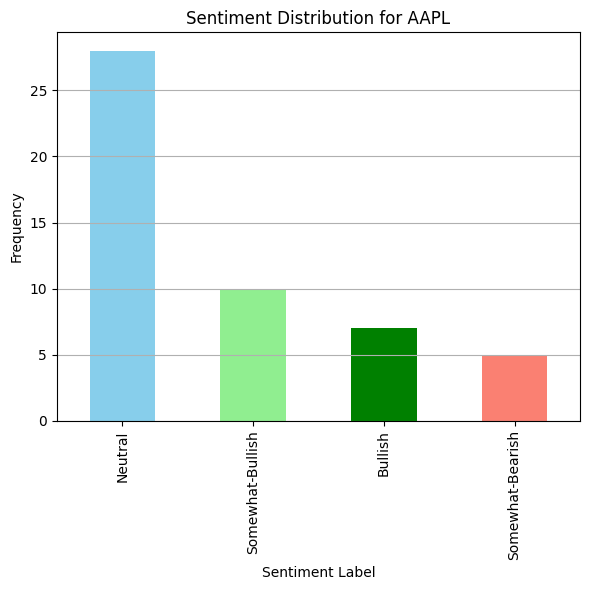

In [38]:
# Sentiment distribution
sentiment_distribution = df['ticker_sentiment_label'].value_counts()
print(sentiment_distribution)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the sentiment distribution
sentiment_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'green', 'salmon'])
ax.set_title('Sentiment Distribution for AAPL')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Frequency')
ax.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# Weighted average sentiment score
df['weighted_sentiment'] = df['relevance_score'] * df['ticker_sentiment_score']
weighted_avg_sentiment = df['weighted_sentiment'].sum() / df['relevance_score'].sum()
weighted_avg_sentiment

0.14925080244456798

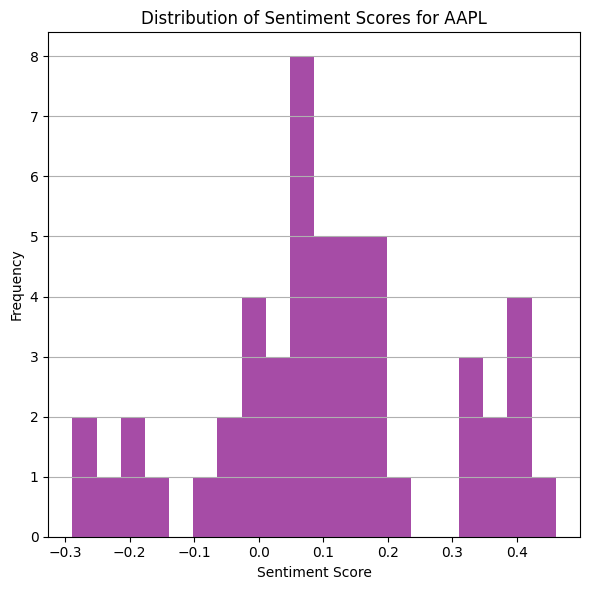

In [37]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the histogram for sentiment scores
df['ticker_sentiment_score'].plot(kind='hist', bins=20, color='purple', alpha=0.7)
ax.set_title('Distribution of Sentiment Scores for AAPL')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Frequency')
ax.grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
import requests
import pandas as pd

def get_sentiment_data(ticker, api_key, data_fetcher):
    """
    Fetches and processes sentiment data for a given ticker, returning a dataframe with averaged sentiment scores.
    """
    url = f'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={ticker}&apikey={api_key}'
    data = data_fetcher.get_data_from_url(url)
    ticker_data_list = []

    for feed_item in data['feed']:
        for ticker_data in feed_item["ticker_sentiment"]:
            if ticker_data['ticker'] == ticker:
                ticker_item = {
                    'ticker': ticker,
                    'relevance_score': float(ticker_data['relevance_score']),
                    'ticker_sentiment_score': float(ticker_data['ticker_sentiment_score']),
                    'ticker_sentiment_label': ticker_data['ticker_sentiment_label'],
                }
                ticker_data_list.append(ticker_item)

    sentiment_df = pd.DataFrame(ticker_data_list)

    sentiment_mapping = {
        "Very-Bullish": 5,
        "Bullish": 4,
        "Somewhat-Bullish": 3,
        "Neutral": 2,
        "Somewhat-Bearish": 1,
        "Bearish": 0,
        "Very-Bearish": -1
    }

    sentiment_df['SentimentScore'] = sentiment_df['ticker_sentiment_label'].map(sentiment_mapping)
    sentiment_df['SentimentScore'] = sentiment_df['SentimentScore'].astype(int)
    sentiment_df['WeightedAverageSentimentScore'] = (sentiment_df['ticker_sentiment_score'] * sentiment_df['relevance_score']).sum() / sentiment_df['relevance_score'].sum()

    sentiment_df.drop(columns=['relevance_score', 'ticker_sentim`ent_score', 'ticker_sentiment_label'], inplace=True)

    sentiment_df = sentiment_df.groupby('ticker').mean().reset_index()

    sentiment_df['SentimentScore'] = sentiment_df['SentimentScore']

    return sentiment_df

In [12]:
data_fetcher = DataFetcher(API_TOKEN)

sentiment_df = get_sentiment_data('AAPL', API_TOKEN, data_fetcher)

In [13]:
sentiment_df

,ticker,SentimentScore,WeightedAverageSentimentScore
0,AAPL,2.38,0.149251
